# SQL Validation & Business Insights (Python)

This notebook validates SQL-based business insights by connecting directly to a PostgreSQL database
and visualizing key performance metrics using Python.


In [1]:
!pip install pandas psycopg2-binary matplotlib


   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.7 MB ? eta -:--:--
   ----------- ---------------------------- 0.8/2.7 MB 2.0 MB/s eta 0:00:01
   --------------- ------------------------ 1.0/2.7 MB 1.9 MB/s eta 0:00:01
   --------------------------- ------------ 1.8/2.7 MB 2.3 MB/s eta 0:00:01
   ---------------------------------------- 2.7/2.7 MB 2.7 MB/s eta 0:00:00


In [3]:
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt


In [5]:
conn = psycopg2.connect(
    host="localhost",
    database="business_analytics",
    user="postgres",
    password="shraavya"
)

In [13]:
query = """
SELECT 
    DATE_TRUNC('month', order_date) AS month,
    SUM(sales) AS revenue
FROM orders_large
GROUP BY month
ORDER BY month;
"""

df_monthly = pd.read_sql(query, conn)
df_monthly


C:\Users\shraa\AppData\Local\Temp\ipykernel_5536\2895678796.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_monthly = pd.read_sql(query, conn)


,month,revenue
0,2022-12-31 18:30:00+00:00,179632800.0
1,2023-01-31 18:30:00+00:00,163041400.0
2,2023-02-28 18:30:00+00:00,178194000.0
3,2023-03-31 18:30:00+00:00,179680000.0
4,2023-04-30 18:30:00+00:00,179494000.0
5,2023-05-31 18:30:00+00:00,178469800.0
6,2023-06-30 18:30:00+00:00,183187800.0
7,2023-07-31 18:30:00+00:00,181166400.0
8,2023-08-31 18:30:00+00:00,173984800.0
9,2023-09-30 18:30:00+00:00,179738800.0


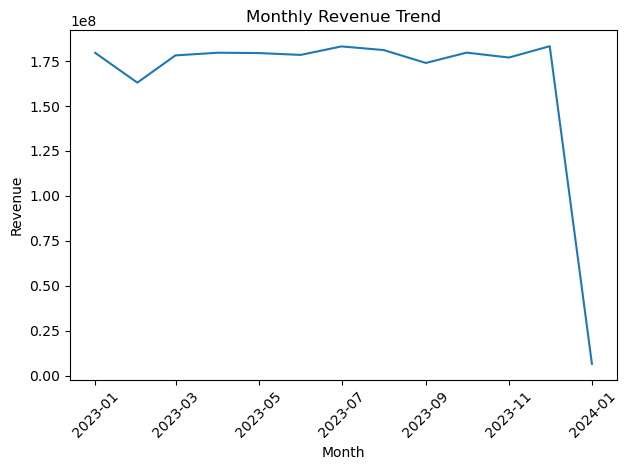

In [15]:
plt.figure()
plt.plot(df_monthly['month'], df_monthly['revenue'])
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.title("Monthly Revenue Trend")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Insight:** Revenue shows fluctuations over time with clear peak periods, indicating possible seasonality in customer demand.


In [9]:
query = """
SELECT 
    region,
    SUM(sales) AS revenue
FROM orders_large
GROUP BY region
ORDER BY revenue DESC;
"""

df_region = pd.read_sql(query, conn)
df_region


C:\Users\shraa\AppData\Local\Temp\ipykernel_5536\2198180546.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_region = pd.read_sql(query, conn)


,region,revenue
0,South,547488000.0
1,West,533420800.0
2,North,532148600.0
3,East,530394000.0


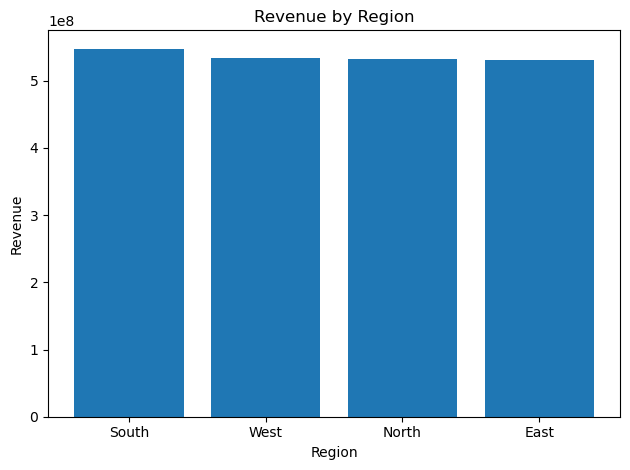

In [17]:
plt.figure()
plt.bar(df_region['region'], df_region['revenue'])
plt.xlabel("Region")
plt.ylabel("Revenue")
plt.title("Revenue by Region")
plt.tight_layout()
plt.show()


**Insight:** Revenue is concentrated in specific regions, highlighting areas of strong performance and regions requiring strategic focus.
